In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
full_dataset = pd.concat(objs = [train, test], axis = 0).reset_index(drop = True)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [40]:
full_dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


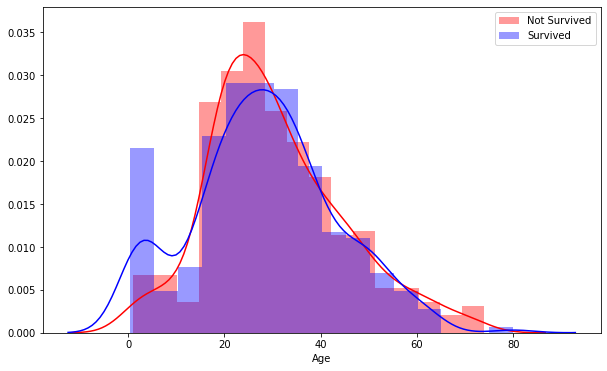

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.distplot(full_dataset['Age'][(full_dataset['Age'].notnull()) & (full_dataset['Survived']==0)], color = 'r', ax = ax)
sns.distplot(full_dataset['Age'][(full_dataset['Age'].notnull()) & (full_dataset['Survived']==1)], color = 'b', ax = ax)

plt.legend(['Not Survived', 'Survived'])

In [42]:
def age_classify(x):
    return int(x//10)

In [43]:
full_dataset['Age'].isnull().sum()

263

In [44]:
full_dataset['n_Age'] = full_dataset['Age'][full_dataset['Age'].notnull()].apply(age_classify)

In [45]:
full_dataset['n_Age'].value_counts()

2.0    344
3.0    232
1.0    143
4.0    135
0.0     82
5.0     70
6.0     32
7.0      7
8.0      1
Name: n_Age, dtype: int64

In [46]:
m = len(full_dataset['n_Age'].value_counts())

In [47]:
total = full_dataset['n_Age'].value_counts().sum()
total_null = full_dataset['n_Age'].isnull().sum()

In [48]:
print(m , total, total_null)

9 1046 263


In [49]:
age_perc = full_dataset['n_Age'].value_counts()/full_dataset['n_Age'].value_counts().sum()
age_dist = round(age_perc * total_null)

In [50]:
print(age_perc.sort_index())

0.0    0.078394
1.0    0.136711
2.0    0.328872
3.0    0.221797
4.0    0.129063
5.0    0.066922
6.0    0.030593
7.0    0.006692
8.0    0.000956
Name: n_Age, dtype: float64


In [51]:
print(age_dist.sort_index())

0.0    21.0
1.0    36.0
2.0    86.0
3.0    58.0
4.0    34.0
5.0    18.0
6.0     8.0
7.0     2.0
8.0     0.0
Name: n_Age, dtype: float64


In [52]:
age_perc.values

array([0.32887189, 0.22179732, 0.13671128, 0.1290631 , 0.07839388,
       0.06692161, 0.03059273, 0.00669216, 0.00095602])

In [53]:
for i in full_dataset['n_Age'].index[full_dataset['n_Age'].isnull()]:
    full_dataset['n_Age'][i] = np.random.choice(age_perc.index.tolist(), p = age_perc.values.tolist())

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
full_dataset['n_Age'].isnull().sum()

0

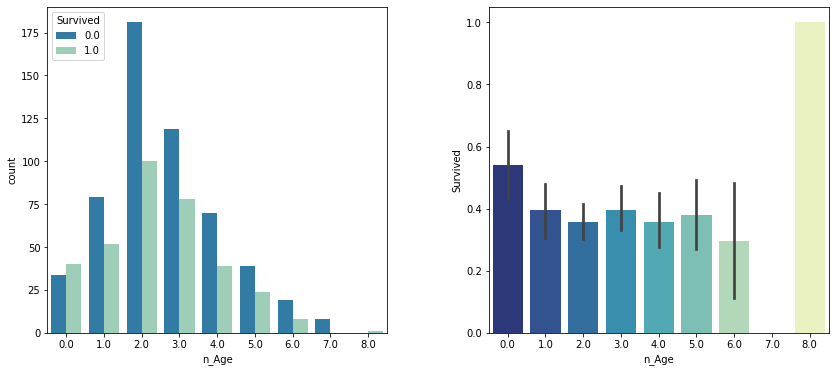

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

g1 = sns.countplot( x = 'n_Age', hue = 'Survived', data = full_dataset, palette = 'YlGnBu_r', ax = ax[0])
g2 = sns.factorplot( x = 'n_Age', y = 'Survived', data = full_dataset, palette = 'YlGnBu_r', ax = ax[1], kind = 'bar')

plt.close(g2.fig)
plt.subplots_adjust(wspace = 0.3)

In [56]:
full_dataset.drop(labels=['Age'], axis = 1, inplace = True)

In [57]:
full_dataset['Sex'].value_counts().sum()

1309

In [58]:
full_dataset['FamSize'] = full_dataset['SibSp'] + full_dataset['Parch'] + 1

In [59]:
full_dataset['SibSp'].value_counts().sum()

1309

In [60]:
full_dataset['Parch'].value_counts().sum()

1309

In [67]:
full_dataset['FamSize'].value_counts().sort_index()
full_dataset['IsAlone'] = 0
full_dataset['IsAlone'].loc[full_dataset['FamSize'] == 1] = 1

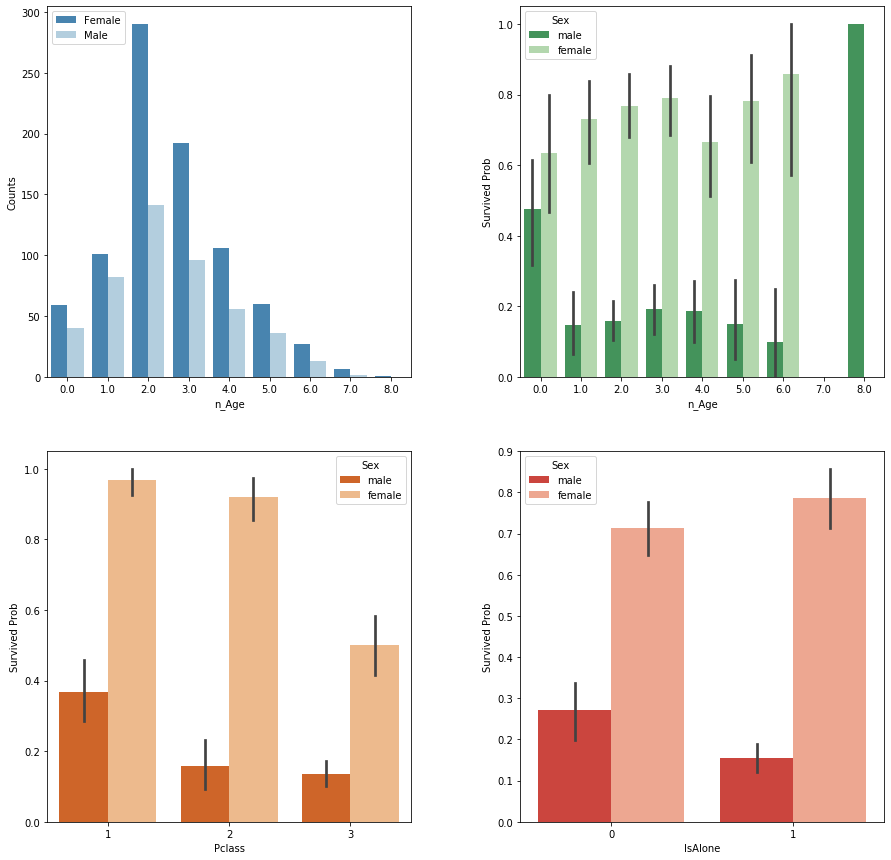

In [69]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
g1 = sns.countplot(x = 'n_Age', hue = 'Sex', data= full_dataset, palette = 'Blues_r', ax = ax[0, 0])
g2 = sns.barplot(  x = 'n_Age', y = 'Survived', hue = 'Sex', data = full_dataset, palette = 'Greens_r', ax = ax[0, 1])
g3 = sns.barplot(  x = 'Pclass', y = 'Survived', hue = 'Sex', data = full_dataset, palette = 'Oranges_r', ax = ax[1, 0])
g4 = sns.barplot(  x = 'IsAlone', y = 'Survived', hue = 'Sex', data = full_dataset, palette = 'Reds_r', ax = ax[1, 1])

g1.set_ylabel('Counts')
g2.set_ylabel('Survived Prob')
g3.set_ylabel('Survived Prob')
g4.set_ylabel('Survived Prob')

ax[0,0].legend(['Female', 'Male'])
plt.subplots_adjust(wspace=0.3)

In [70]:
embark_dict = {'S' : 1, 'C': 2, 'Q': 3}

In [71]:
full_dataset['Fare'].fillna(int(full_dataset['Fare'].median()), inplace = True)
full_dataset['n_Fare'] = full_dataset['Fare']//1.0

In [72]:
full_dataset['Fare'].value_counts()
full_dataset['n_Fare'] = pd.qcut(full_dataset['n_Fare'], 7, [1, 2, 3, 4, 5, 6, 7])
full_dataset['n_Fare'].value_counts()

1    360
4    191
5    188
7    186
6    182
3    103
2     99
Name: n_Fare, dtype: int64

In [73]:
full_dataset['Embarked'].fillna('S', inplace = True)

In [74]:
full_dataset['n_Embarked'] = full_dataset['Embarked'].map(embark_dict)

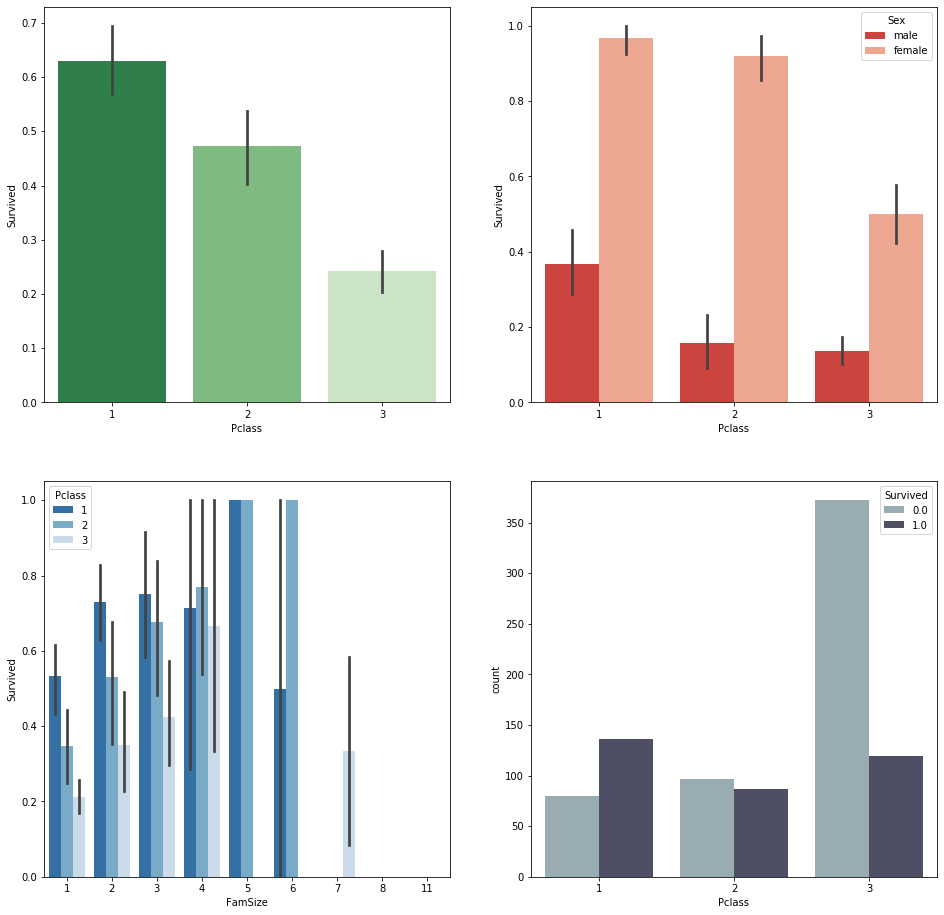

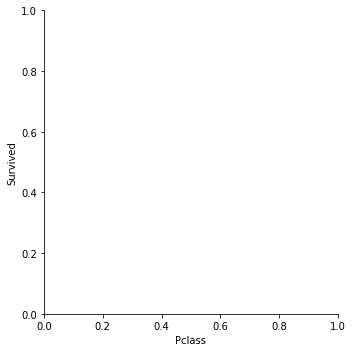

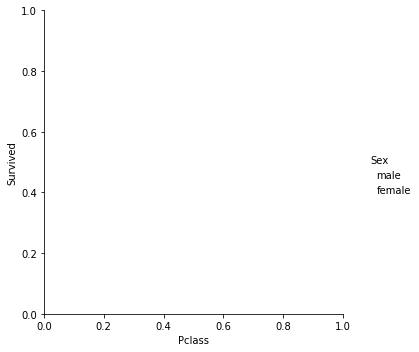

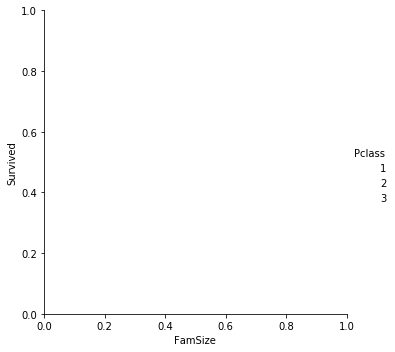

In [75]:
fig, ax = plt.subplots(2,2, figsize = (16, 16))

g1 = sns.factorplot(x = 'Pclass', y = 'Survived', data = full_dataset, palette = 'Greens_r', kind = 'bar', ax = ax[0, 0])
g2 = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = full_dataset, palette = 'Reds_r', kind = 'bar', ax = ax[0, 1])
g3 = sns.factorplot(x = 'FamSize', y = 'Survived', hue = 'Pclass', data = full_dataset, palette = 'Blues_r', kind = 'bar', ax = ax[1, 0])
g4 = sns.countplot(x = 'Pclass', hue = 'Survived', data = full_dataset, palette = 'bone_r', ax = ax[1,1])

In [76]:
def extract_title(name):
    title = name.split(',')[1].split('.')[0]
    return title.strip()
full_dataset['Title'] = full_dataset['Name'].apply(extract_title)
full_dataset['Title'].value_counts()
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
full_dataset['Title'].replace(['Ms', 'Mme'], 'Miss', inplace = True)
rare_titles = [rare for rare in full_dataset['Title'].values.tolist() if rare not in common_titles]
rare_titles = list(dict.fromkeys(rare_titles))
full_dataset['Title'].replace(rare_titles, 'Rare', inplace = True)
full_dataset['Title'].value_counts()

Mr        757
Miss      263
Mrs       197
Master     61
Rare       31
Name: Title, dtype: int64

In [77]:
full_dataset = pd.get_dummies(full_dataset, columns = ['Sex'], prefix = 'Sx')
full_dataset = pd.get_dummies(full_dataset, columns = ['Embarked'], prefix = 'Em')
full_dataset = pd.get_dummies(full_dataset, columns = ['Title'], prefix = 'Tt')
full_dataset = pd.get_dummies(full_dataset, columns = ['n_Fare'], prefix = 'nF')

In [78]:
full_dataset.head()

,Cabin,Fare,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,n_Age,...,Tt_Mr,Tt_Mrs,Tt_Rare,nF_1,nF_2,nF_3,nF_4,nF_5,nF_6,nF_7
0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,0.0,A/5 21171,2.0,...,1,0,0,1,0,0,0,0,0,0
1,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1.0,PC 17599,3.0,...,0,1,0,0,0,0,0,0,0,1
2,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,1.0,STON/O2. 3101282,2.0,...,0,0,0,1,0,0,0,0,0,0
3,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1.0,113803,3.0,...,0,1,0,0,0,0,0,0,1,0
4,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,0,0.0,373450,3.0,...,1,0,0,0,1,0,0,0,0,0


In [79]:
full_dataset.drop(['Cabin', 'Fare', 'Name', 'Parch', 'PassengerId', 'SibSp', 'Ticket'], axis = 1, inplace = True)
full_dataset.head()

,Pclass,Survived,n_Age,FamSize,IsAlone,n_Embarked,Sx_female,Sx_male,Em_C,Em_Q,...,Tt_Mr,Tt_Mrs,Tt_Rare,nF_1,nF_2,nF_3,nF_4,nF_5,nF_6,nF_7
0,3,0.0,2.0,2,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1,1.0,3.0,2,0,2,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,3,1.0,2.0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1.0,3.0,2,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3,0.0,3.0,1,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [80]:
full_dataset.columns.values

array(['Pclass', 'Survived', 'n_Age', 'FamSize', 'IsAlone', 'n_Embarked',
       'Sx_female', 'Sx_male', 'Em_C', 'Em_Q', 'Em_S', 'Tt_Master',
       'Tt_Miss', 'Tt_Mr', 'Tt_Mrs', 'Tt_Rare', 'nF_1', 'nF_2', 'nF_3',
       'nF_4', 'nF_5', 'nF_6', 'nF_7'], dtype=object)

In [81]:
train_len = len(train)
train_set = full_dataset[:train_len]
test_set = full_dataset[train_len:]

In [82]:
train_set['Survived'] = train_set['Survived'].astype(int)
Y_train = train_set['Survived']
X_train = train_set.drop(labels =['Survived'], axis = 1)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

In [84]:
from sklearn import svm

In [85]:
clf = svm.SVC(kernel = 'linear', C=1).fit(X_train, Y_train)

In [86]:
scores = cross_val_score(clf, X_train, Y_train, cv = 5)
scores

array([0.84916201, 0.82022472, 0.82022472, 0.79775281, 0.85955056])

In [87]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.04)


In [88]:
kfold = StratifiedKFold(n_splits = 10)

In [89]:
train_set['Survived'] = train_set['Survived'].astype(int)

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
train_set.columns.values

array(['Pclass', 'Survived', 'n_Age', 'FamSize', 'IsAlone', 'n_Embarked',
       'Sx_female', 'Sx_male', 'Em_C', 'Em_Q', 'Em_S', 'Tt_Master',
       'Tt_Miss', 'Tt_Mr', 'Tt_Mrs', 'Tt_Rare', 'nF_1', 'nF_2', 'nF_3',
       'nF_4', 'nF_5', 'nF_6', 'nF_7'], dtype=object)

In [91]:
from sklearn.ensemble import RandomForestClassifier
random_state = 3
RandomForest = RandomForestClassifier(random_state = random_state)
results = cross_val_score(RandomForest, X_train, y = Y_train, scoring = 'accuracy', cv = kfold, n_jobs = 4)

In [92]:
print('Accuracy: %0.2f (+/- %0.2f)' % (results.mean(), results.std() * 2))

Accuracy: 0.81 (+/- 0.08)


In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve

In [54]:
#Copy-paste from kaggle user llleedh
random_state = 3
classifiers = []

classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

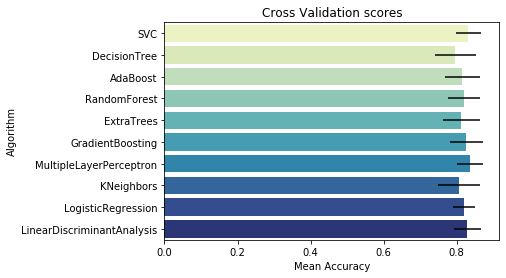

In [55]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=Y_train, scoring='accuracy', cv=kfold, n_jobs=4))

cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append( cv_result.mean() )
    cv_std.append(   cv_result.std()  )
    
cv_res = pd.DataFrame({'CrossValMeans':cv_means, 'CorssValerrors':cv_std,
                       'Algorithm':['SVC','DecisionTree','AdaBoost','RandomForest','ExtraTrees',
                                    'GradientBoosting','MultipleLayerPerceptron','KNeighbors','LogisticRegression','LinearDiscriminantAnalysis']})

g = sns.barplot('CrossValMeans','Algorithm', data=cv_res, palette='YlGnBu', orient='h', **{'xerr':cv_std})
g = g.set(title='Cross Validation scores',xlabel='Mean Accuracy')

In [56]:
svc_classifiers = []
kernel_list = []
svc_classifiers.append(SVC(kernel = 'rbf'))
kernel_list.append('rbf')
svc_classifiers.append(SVC(kernel = 'linear'))
kernel_list.append('linear')
svc_classifiers.append(SVC(kernel = 'poly'))
kernel_list.append('poly')
svc_classifiers.append(SVC(kernel = 'sigmoid'))
kernel_list.append('sigmoid')

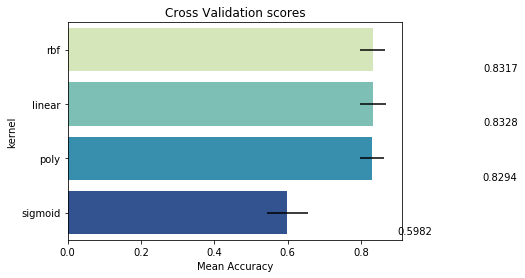

In [59]:
svc_results = []

for classifier in svc_classifiers:
    svc_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy', cv=kfold, n_jobs = 4))
svc_means = []
svc_std = []
for svc_result in svc_results:
    svc_means.append(svc_result.mean())
    svc_std.append( svc_result.std())
    
svc_res = pd.DataFrame({'SVC CrossValMeans':svc_means, 'CrossValErrors':svc_std,
                       'kernel': kernel_list})
g = sns.barplot('SVC CrossValMeans','kernel', data=svc_res, palette='YlGnBu', orient='h', **{'xerr':svc_std})
show_values_on_bars(g, 'h', 0.3)
g = g.set(title='Cross Validation scores',xlabel='Mean Accuracy')

In [58]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = round(p.get_height(), 4)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = round(p.get_width(), 4)
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [182]:
svc_classifiers = []
kernel_list = []
svc_classifiers.append(SVC(kernel = 'rbf', gamma = 'auto'))
kernel_list.append('rbf')
svc_classifiers.append(SVC(kernel = 'linear'))
kernel_list.append('linear')
svc_classifiers.append(SVC(kernel = 'poly', gamma = 'auto'))
kernel_list.append('poly')

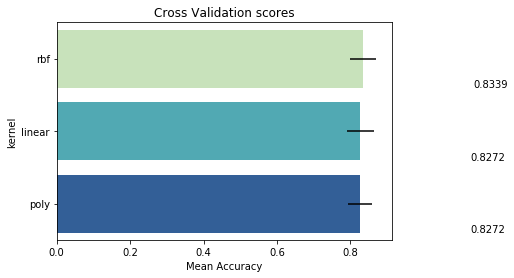

In [183]:
svc_results = []

for classifier in svc_classifiers:
    svc_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy', cv=kfold, n_jobs = 4))
svc_means = []
svc_std = []
for svc_result in svc_results:
    svc_means.append(svc_result.mean())
    svc_std.append( svc_result.std())
    
svc_res = pd.DataFrame({'SVC CrossValMeans':svc_means, 'CrossValErrors':svc_std,
                       'kernel': kernel_list})
g = sns.barplot('SVC CrossValMeans','kernel', data=svc_res, palette='YlGnBu', orient='h', **{'xerr':svc_std})
show_values_on_bars(g, 'h', 0.3)
g = g.set(title='Cross Validation scores',xlabel='Mean Accuracy')

In [184]:
svc_classifiers = []
kernel_list = []
svc_classifiers.append(SVC(kernel = 'rbf', gamma = 'auto'))
kernel_list.append('rbf')
svc_classifiers.append(SVC(kernel = 'linear'))
kernel_list.append('linear')
svc_classifiers.append(SVC(kernel = 'poly', gamma = 'auto', degree = 4))
kernel_list.append('poly')

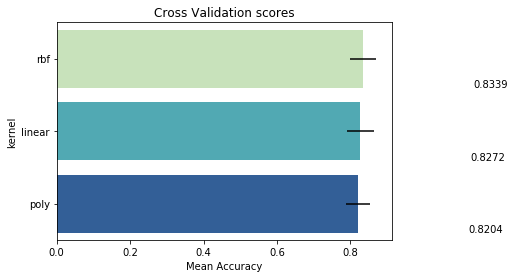

In [185]:
svc_results = []

for classifier in svc_classifiers:
    svc_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy', cv=kfold, n_jobs = 4))
svc_means = []
svc_std = []
for svc_result in svc_results:
    svc_means.append(svc_result.mean())
    svc_std.append( svc_result.std())
    
svc_res = pd.DataFrame({'SVC CrossValMeans':svc_means, 'CrossValErrors':svc_std,
                       'kernel': kernel_list})
g = sns.barplot('SVC CrossValMeans','kernel', data=svc_res, palette='YlGnBu', orient='h', **{'xerr':svc_std})
show_values_on_bars(g, 'h', 0.3)
g = g.set(title='Cross Validation scores',xlabel='Mean Accuracy')

In [186]:
svc_classifiers = []
kernel_list = []
svc_classifiers.append(SVC(kernel = 'poly', degree = 1))
kernel_list.append('1')
svc_classifiers.append(SVC(kernel = 'poly', degree = 2))
kernel_list.append('2')
svc_classifiers.append(SVC(kernel = 'poly', degree = 3))
kernel_list.append('3')
svc_classifiers.append(SVC(kernel = 'poly', degree = 4))
kernel_list.append('4')
svc_classifiers.append(SVC(kernel = 'poly', degree = 5))
kernel_list.append('5')

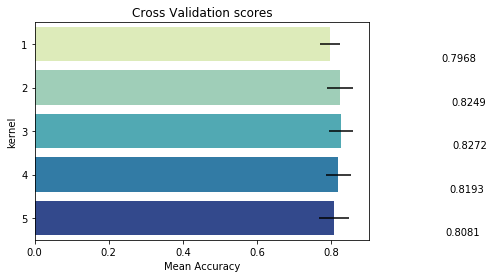

In [187]:
svc_results = []

for classifier in svc_classifiers:
    svc_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy', cv=kfold, n_jobs = 4))
svc_means = []
svc_std = []
for svc_result in svc_results:
    svc_means.append(svc_result.mean())
    svc_std.append( svc_result.std())
    
svc_res = pd.DataFrame({'SVC CrossValMeans':svc_means, 'CrossValErrors':svc_std,
                       'kernel': kernel_list})
g = sns.barplot('SVC CrossValMeans','kernel', data=svc_res, palette='YlGnBu', orient='h', **{'xerr':svc_std})
show_values_on_bars(g, 'h', 0.3)
g = g.set(title='Cross Validation scores',xlabel='Mean Accuracy')

In [188]:
svc_classifiers = []
kernel_list = []
svc_classifiers.append(SVC(kernel = 'rbf', gamma = 'auto', decision_function_shape = 'ovo'))
kernel_list.append('ovo')
svc_classifiers.append(SVC(kernel = 'rbf', gamma = 'auto', decision_function_shape = 'ovr'))
kernel_list.append('ovr')

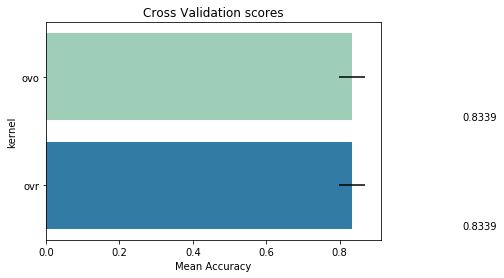

In [189]:
svc_results = []

for classifier in svc_classifiers:
    svc_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy', cv=kfold, n_jobs = 4))
svc_means = []
svc_std = []
for svc_result in svc_results:
    svc_means.append(svc_result.mean())
    svc_std.append( svc_result.std())
    
svc_res = pd.DataFrame({'SVC CrossValMeans':svc_means, 'CrossValErrors':svc_std,
                       'kernel': kernel_list})
g = sns.barplot('SVC CrossValMeans','kernel', data=svc_res, palette='YlGnBu', orient='h', **{'xerr':svc_std})
show_values_on_bars(g, 'h', 0.3)
g = g.set(title='Cross Validation scores',xlabel='Mean Accuracy')

In [214]:
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, tree, discriminant_analysis, feature_selection
from sklearn import model_selection
from xgboost import XGBClassifier

In [201]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
Target = ['Survived']

MLA_predict = train_set[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv = cv_split, return_train_score = True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, Y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\daniel_lee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.834082,0.83209,0.0444954,0.0796001
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.879588,0.828358,0.0644994,0.1627
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.867978,0.827239,0.0539292,0.1265
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.858801,0.824254,0.0844315,0.0126
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.894944,0.823881,0.0632834,0.2805
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.829401,0.823881,0.0545644,0.094
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.916667,0.823134,0.0679432,0.0453
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.831273,0.822761,0.0670241,0.0710999
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.926217,0.821269,0.0653582,0.3405
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.829775,0.820896,0.0675363,0.0118


Text(0, 0.5, 'Algorithm')

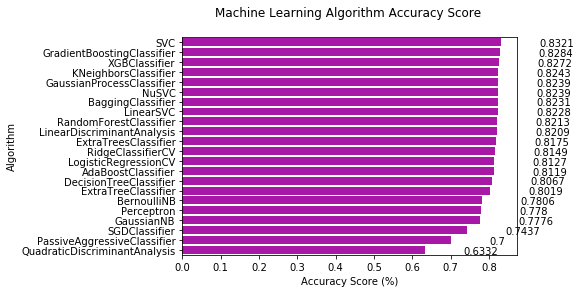

In [203]:
g = sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
show_values_on_bars(g, 'h', 0.1)
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [210]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, X_train, Y_train, cv = cv_split, return_train_score = True)
dtree.fit(X_train, Y_train)

print('BEFORE DT Parameters: ', dtree.get_params())
print('BEFORE DT Training with bin score mean: {:.2f}'. format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training with bin score mean: 92.62
BEFORE DT Test w/bin score mean: 80.45
BEFORE DT Test w/bin score 3*std: +/- 7.28
----------


In [218]:
#param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0], 'min_samples_split': [2,5,10,.03,.05],
             #'min_samples_leaf': [1, 4, 10, .03, .05], 'max_features': [None, 'auto']}
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, None], 'random_state': [0]}
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
tune_model.fit(X_train, Y_train)

print('AFTER DT parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

AFTER DT parameters:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.71
AFTER DT Test w/bin score mean: 87.11
AFTER DT Test w/bin score 3*std: +/- 8.66
----------


In [219]:
print('BEFORE DT RFE Training Shape Old: ', X_train.shape) 
print('BEFORE DT RFE Training Columns Old: ', X_train.columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X_train, Y_train)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = X_train.columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, X_train[X_rfe], Y_train, cv  = cv_split, return_train_score = True)

print('AFTER DT RFE Training Shape New: ', X_train[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)

#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
rfe_tune_model.fit(X_train[X_rfe], Y_train)

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 21)
BEFORE DT RFE Training Columns Old:  ['Pclass' 'n_Age' 'FamSize' 'n_Embarked' 'Sx_female' 'Sx_male' 'Em_C'
 'Em_Q' 'Em_S' 'Tt_Master' 'Tt_Miss' 'Tt_Mr' 'Tt_Mrs' 'Tt_Rare' 'nF_1'
 'nF_2' 'nF_3' 'nF_4' 'nF_5' 'nF_6' 'nF_7']
BEFORE DT RFE Training w/bin score mean: 92.62
BEFORE DT RFE Test w/bin score mean: 80.45
BEFORE DT RFE Test w/bin score 3*std: +/- 7.28
----------
AFTER DT RFE Training Shape New:  (891, 20)
AFTER DT RFE Training Columns New:  ['Pclass' 'n_Age' 'FamSize' 'n_Embarked' 'Sx_female' 'Sx_male' 'Em_C'
 'Em_Q' 'Em_S' 'Tt_Miss' 'Tt_Mr' 'Tt_Mrs' 'Tt_Rare' 'nF_1' 'nF_2' 'nF_3'
 'nF_4' 'nF_5' 'nF_6' 'nF_7']
AFTER DT RFE Training w/bin score mean: 92.62
AFTER DT RFE Test w/bin score mean: 80.90
AFTER DT RFE Test w/bin score 3*std: +/- 8.04
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.61
AFTER DT RFE Tuned Test w/bin score mean: 8

In [93]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import losses
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.regularizers import l2, l1
from keras.callbacks import ModelCheckpoint
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [94]:
def TitanicModel(input_row):
    X_input = Input(shape= input_row)
    X = Dense(64, activation = 'relu', use_bias = True, bias_regularizer = l2(0.01))(X_input)
    X = Dropout(.4)(X)
    X = Dense(12, activation = 'relu', use_bias = True, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(X)
    X = Dropout(.4)(X)
    X = Dense(6, activation = 'relu', use_bias = True, bias_regularizer = l2(0.01))(X)
    X = Dropout(.4)(X)
    X = Dense(1, activation = 'sigmoid', use_bias = True, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(X)
    model = Model(inputs = X_input, outputs = X, name = 'TitanicModel')
    return model

In [95]:
titanicmodel = TitanicModel(X_train.shape[1:])

In [96]:
titanicmodel.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])
filepath = 'weights-improvement{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode = 'max')
callbacks_list = [checkpoint]

In [97]:
titanicmodel.fit(x = X_train, y = Y_train, epochs = 600, validation_split = 0.15, batch_size = None, callbacks = callbacks_list)

Train on 757 samples, validate on 134 samples
Epoch 1/600
757/757 [==============================] - 1s 984us/step - loss: 1.0322 - accuracy: 0.4901 - val_loss: 0.8882 - val_accuracy: 0.6791

Epoch 00001: val_accuracy improved from -inf to 0.67910, saving model to weights-improvement01-0.68.hdf5
Epoch 2/600
757/757 [==============================] - 0s 106us/step - loss: 0.9156 - accuracy: 0.4954 - val_loss: 0.8618 - val_accuracy: 0.7164

Epoch 00002: val_accuracy improved from 0.67910 to 0.71642, saving model to weights-improvement02-0.72.hdf5
Epoch 3/600
757/757 [==============================] - 0s 74us/step - loss: 0.8801 - accuracy: 0.5271 - val_loss: 0.8450 - val_accuracy: 0.6493

Epoch 00003: val_accuracy did not improve from 0.71642
Epoch 4/600
757/757 [==============================] - 0s 73us/step - loss: 0.8479 - accuracy: 0.5627 - val_loss: 0.8276 - val_accuracy: 0.6493

Epoch 00004: val_accuracy did not improve from 0.71642
Epoch 5/600
757/757 [============================

757/757 [==============================] - 0s 106us/step - loss: 0.6038 - accuracy: 0.7517 - val_loss: 0.5215 - val_accuracy: 0.8284

Epoch 00040: val_accuracy did not improve from 0.83582
Epoch 41/600
757/757 [==============================] - 0s 75us/step - loss: 0.6035 - accuracy: 0.7490 - val_loss: 0.5122 - val_accuracy: 0.8358

Epoch 00041: val_accuracy did not improve from 0.83582
Epoch 42/600
757/757 [==============================] - 0s 70us/step - loss: 0.6293 - accuracy: 0.7266 - val_loss: 0.5139 - val_accuracy: 0.8358

Epoch 00042: val_accuracy did not improve from 0.83582
Epoch 43/600
757/757 [==============================] - 0s 63us/step - loss: 0.5823 - accuracy: 0.7543 - val_loss: 0.5097 - val_accuracy: 0.8284

Epoch 00043: val_accuracy did not improve from 0.83582
Epoch 44/600
757/757 [==============================] - 0s 67us/step - loss: 0.5955 - accuracy: 0.7371 - val_loss: 0.5085 - val_accuracy: 0.8358

Epoch 00044: val_accuracy did not improve from 0.83582
Epoch 4

757/757 [==============================] - 0s 70us/step - loss: 0.5355 - accuracy: 0.7834 - val_loss: 0.4515 - val_accuracy: 0.8209

Epoch 00081: val_accuracy did not improve from 0.83582
Epoch 82/600
757/757 [==============================] - 0s 67us/step - loss: 0.5396 - accuracy: 0.7662 - val_loss: 0.4513 - val_accuracy: 0.8209

Epoch 00082: val_accuracy did not improve from 0.83582
Epoch 83/600
757/757 [==============================] - 0s 71us/step - loss: 0.5476 - accuracy: 0.7662 - val_loss: 0.4513 - val_accuracy: 0.8284

Epoch 00083: val_accuracy did not improve from 0.83582
Epoch 84/600
757/757 [==============================] - 0s 70us/step - loss: 0.5488 - accuracy: 0.7728 - val_loss: 0.4527 - val_accuracy: 0.8209

Epoch 00084: val_accuracy did not improve from 0.83582
Epoch 85/600
757/757 [==============================] - 0s 67us/step - loss: 0.5442 - accuracy: 0.7583 - val_loss: 0.4492 - val_accuracy: 0.8284

Epoch 00085: val_accuracy did not improve from 0.83582
Epoch 86

757/757 [==============================] - 0s 89us/step - loss: 0.5079 - accuracy: 0.7900 - val_loss: 0.4194 - val_accuracy: 0.8358

Epoch 00121: val_accuracy did not improve from 0.84328
Epoch 122/600
757/757 [==============================] - 0s 94us/step - loss: 0.5119 - accuracy: 0.8018 - val_loss: 0.4208 - val_accuracy: 0.8358

Epoch 00122: val_accuracy did not improve from 0.84328
Epoch 123/600
757/757 [==============================] - 0s 90us/step - loss: 0.5166 - accuracy: 0.7913 - val_loss: 0.4261 - val_accuracy: 0.8358

Epoch 00123: val_accuracy did not improve from 0.84328
Epoch 124/600
757/757 [==============================] - 0s 102us/step - loss: 0.5106 - accuracy: 0.8085 - val_loss: 0.4243 - val_accuracy: 0.8358

Epoch 00124: val_accuracy did not improve from 0.84328
Epoch 125/600
757/757 [==============================] - 0s 78us/step - loss: 0.5075 - accuracy: 0.7979 - val_loss: 0.4205 - val_accuracy: 0.8358

Epoch 00125: val_accuracy did not improve from 0.84328
Epo

757/757 [==============================] - 0s 71us/step - loss: 0.5014 - accuracy: 0.8164 - val_loss: 0.4096 - val_accuracy: 0.8433

Epoch 00161: val_accuracy did not improve from 0.85821
Epoch 162/600
757/757 [==============================] - 0s 71us/step - loss: 0.4889 - accuracy: 0.8164 - val_loss: 0.4087 - val_accuracy: 0.8582

Epoch 00162: val_accuracy did not improve from 0.85821
Epoch 163/600
757/757 [==============================] - 0s 69us/step - loss: 0.4886 - accuracy: 0.7966 - val_loss: 0.4048 - val_accuracy: 0.8358

Epoch 00163: val_accuracy did not improve from 0.85821
Epoch 164/600
757/757 [==============================] - 0s 63us/step - loss: 0.4756 - accuracy: 0.8177 - val_loss: 0.4056 - val_accuracy: 0.8507

Epoch 00164: val_accuracy did not improve from 0.85821
Epoch 165/600
757/757 [==============================] - 0s 62us/step - loss: 0.4982 - accuracy: 0.8085 - val_loss: 0.4052 - val_accuracy: 0.8507

Epoch 00165: val_accuracy did not improve from 0.85821
Epoc

757/757 [==============================] - 0s 71us/step - loss: 0.4861 - accuracy: 0.8309 - val_loss: 0.3987 - val_accuracy: 0.8582

Epoch 00201: val_accuracy did not improve from 0.86567
Epoch 202/600
757/757 [==============================] - 0s 71us/step - loss: 0.4727 - accuracy: 0.8296 - val_loss: 0.3993 - val_accuracy: 0.8582

Epoch 00202: val_accuracy did not improve from 0.86567
Epoch 203/600
757/757 [==============================] - 0s 89us/step - loss: 0.5035 - accuracy: 0.8137 - val_loss: 0.3998 - val_accuracy: 0.8582

Epoch 00203: val_accuracy did not improve from 0.86567
Epoch 204/600
757/757 [==============================] - 0s 87us/step - loss: 0.4957 - accuracy: 0.8256 - val_loss: 0.4023 - val_accuracy: 0.8582

Epoch 00204: val_accuracy did not improve from 0.86567
Epoch 205/600
757/757 [==============================] - 0s 75us/step - loss: 0.4737 - accuracy: 0.8177 - val_loss: 0.3991 - val_accuracy: 0.8582

Epoch 00205: val_accuracy did not improve from 0.86567
Epoc


Epoch 00241: val_accuracy did not improve from 0.86567
Epoch 242/600
757/757 [==============================] - 0s 87us/step - loss: 0.4738 - accuracy: 0.8296 - val_loss: 0.3936 - val_accuracy: 0.8657

Epoch 00242: val_accuracy did not improve from 0.86567
Epoch 243/600
757/757 [==============================] - 0s 96us/step - loss: 0.4883 - accuracy: 0.8151 - val_loss: 0.3986 - val_accuracy: 0.8582

Epoch 00243: val_accuracy did not improve from 0.86567
Epoch 244/600
757/757 [==============================] - 0s 81us/step - loss: 0.4910 - accuracy: 0.8177 - val_loss: 0.3962 - val_accuracy: 0.8582

Epoch 00244: val_accuracy did not improve from 0.86567
Epoch 245/600
757/757 [==============================] - 0s 70us/step - loss: 0.4709 - accuracy: 0.8217 - val_loss: 0.3962 - val_accuracy: 0.8582

Epoch 00245: val_accuracy did not improve from 0.86567
Epoch 246/600
757/757 [==============================] - 0s 63us/step - loss: 0.4611 - accuracy: 0.8349 - val_loss: 0.3955 - val_accurac

757/757 [==============================] - 0s 87us/step - loss: 0.4883 - accuracy: 0.8243 - val_loss: 0.4008 - val_accuracy: 0.8657

Epoch 00282: val_accuracy did not improve from 0.86567
Epoch 283/600
757/757 [==============================] - 0s 91us/step - loss: 0.4609 - accuracy: 0.8336 - val_loss: 0.4004 - val_accuracy: 0.8657

Epoch 00283: val_accuracy did not improve from 0.86567
Epoch 284/600
757/757 [==============================] - 0s 66us/step - loss: 0.4634 - accuracy: 0.8336 - val_loss: 0.4014 - val_accuracy: 0.8657

Epoch 00284: val_accuracy did not improve from 0.86567
Epoch 285/600
757/757 [==============================] - 0s 66us/step - loss: 0.4653 - accuracy: 0.8230 - val_loss: 0.3951 - val_accuracy: 0.8657

Epoch 00285: val_accuracy did not improve from 0.86567
Epoch 286/600
757/757 [==============================] - 0s 65us/step - loss: 0.4657 - accuracy: 0.8375 - val_loss: 0.3959 - val_accuracy: 0.8657

Epoch 00286: val_accuracy did not improve from 0.86567
Epoc

757/757 [==============================] - 0s 74us/step - loss: 0.4613 - accuracy: 0.8362 - val_loss: 0.3936 - val_accuracy: 0.8657

Epoch 00322: val_accuracy did not improve from 0.87313
Epoch 323/600
757/757 [==============================] - 0s 71us/step - loss: 0.4556 - accuracy: 0.8402 - val_loss: 0.3967 - val_accuracy: 0.8657

Epoch 00323: val_accuracy did not improve from 0.87313
Epoch 324/600
757/757 [==============================] - 0s 67us/step - loss: 0.4635 - accuracy: 0.8388 - val_loss: 0.3960 - val_accuracy: 0.8657

Epoch 00324: val_accuracy did not improve from 0.87313
Epoch 325/600
757/757 [==============================] - 0s 67us/step - loss: 0.4459 - accuracy: 0.8349 - val_loss: 0.3965 - val_accuracy: 0.8657

Epoch 00325: val_accuracy did not improve from 0.87313
Epoch 326/600
757/757 [==============================] - 0s 71us/step - loss: 0.4693 - accuracy: 0.8283 - val_loss: 0.3963 - val_accuracy: 0.8657

Epoch 00326: val_accuracy did not improve from 0.87313
Epoc


Epoch 00362: val_accuracy did not improve from 0.87313
Epoch 363/600
757/757 [==============================] - 0s 127us/step - loss: 0.4740 - accuracy: 0.8349 - val_loss: 0.3950 - val_accuracy: 0.8657

Epoch 00363: val_accuracy did not improve from 0.87313
Epoch 364/600
757/757 [==============================] - 0s 120us/step - loss: 0.4377 - accuracy: 0.8507 - val_loss: 0.3944 - val_accuracy: 0.8657

Epoch 00364: val_accuracy did not improve from 0.87313
Epoch 365/600
757/757 [==============================] - 0s 98us/step - loss: 0.4651 - accuracy: 0.8296 - val_loss: 0.3954 - val_accuracy: 0.8657

Epoch 00365: val_accuracy did not improve from 0.87313
Epoch 366/600
757/757 [==============================] - 0s 107us/step - loss: 0.4659 - accuracy: 0.8322 - val_loss: 0.3921 - val_accuracy: 0.8731

Epoch 00366: val_accuracy did not improve from 0.87313
Epoch 367/600
757/757 [==============================] - 0s 107us/step - loss: 0.4561 - accuracy: 0.8322 - val_loss: 0.3990 - val_acc

757/757 [==============================] - 0s 71us/step - loss: 0.4362 - accuracy: 0.8441 - val_loss: 0.3910 - val_accuracy: 0.8731

Epoch 00403: val_accuracy did not improve from 0.87313
Epoch 404/600
757/757 [==============================] - 0s 71us/step - loss: 0.4538 - accuracy: 0.8322 - val_loss: 0.3925 - val_accuracy: 0.8731

Epoch 00404: val_accuracy did not improve from 0.87313
Epoch 405/600
757/757 [==============================] - 0s 71us/step - loss: 0.4629 - accuracy: 0.8309 - val_loss: 0.3923 - val_accuracy: 0.8731

Epoch 00405: val_accuracy did not improve from 0.87313
Epoch 406/600
757/757 [==============================] - 0s 63us/step - loss: 0.4575 - accuracy: 0.8415 - val_loss: 0.3949 - val_accuracy: 0.8731

Epoch 00406: val_accuracy did not improve from 0.87313
Epoch 407/600
757/757 [==============================] - 0s 63us/step - loss: 0.4412 - accuracy: 0.8415 - val_loss: 0.3987 - val_accuracy: 0.8731

Epoch 00407: val_accuracy did not improve from 0.87313
Epoc

757/757 [==============================] - 0s 69us/step - loss: 0.4437 - accuracy: 0.8481 - val_loss: 0.3955 - val_accuracy: 0.8731

Epoch 00443: val_accuracy did not improve from 0.87313
Epoch 444/600
757/757 [==============================] - 0s 75us/step - loss: 0.4517 - accuracy: 0.8322 - val_loss: 0.3981 - val_accuracy: 0.8731

Epoch 00444: val_accuracy did not improve from 0.87313
Epoch 445/600
757/757 [==============================] - 0s 77us/step - loss: 0.4343 - accuracy: 0.8428 - val_loss: 0.3952 - val_accuracy: 0.8731

Epoch 00445: val_accuracy did not improve from 0.87313
Epoch 446/600
757/757 [==============================] - 0s 67us/step - loss: 0.4502 - accuracy: 0.8428 - val_loss: 0.3990 - val_accuracy: 0.8657

Epoch 00446: val_accuracy did not improve from 0.87313
Epoch 447/600
757/757 [==============================] - 0s 70us/step - loss: 0.4492 - accuracy: 0.8441 - val_loss: 0.3936 - val_accuracy: 0.8731

Epoch 00447: val_accuracy did not improve from 0.87313
Epoc


Epoch 00483: val_accuracy did not improve from 0.87313
Epoch 484/600
757/757 [==============================] - 0s 79us/step - loss: 0.4513 - accuracy: 0.8362 - val_loss: 0.4022 - val_accuracy: 0.8582

Epoch 00484: val_accuracy did not improve from 0.87313
Epoch 485/600
757/757 [==============================] - 0s 79us/step - loss: 0.4230 - accuracy: 0.8428 - val_loss: 0.4035 - val_accuracy: 0.8657

Epoch 00485: val_accuracy did not improve from 0.87313
Epoch 486/600
757/757 [==============================] - 0s 102us/step - loss: 0.4491 - accuracy: 0.8402 - val_loss: 0.4056 - val_accuracy: 0.8657

Epoch 00486: val_accuracy did not improve from 0.87313
Epoch 487/600
757/757 [==============================] - 0s 83us/step - loss: 0.4439 - accuracy: 0.8402 - val_loss: 0.4010 - val_accuracy: 0.8657

Epoch 00487: val_accuracy did not improve from 0.87313
Epoch 488/600
757/757 [==============================] - 0s 102us/step - loss: 0.4331 - accuracy: 0.8428 - val_loss: 0.4017 - val_accur

757/757 [==============================] - 0s 71us/step - loss: 0.4343 - accuracy: 0.8520 - val_loss: 0.3997 - val_accuracy: 0.8582

Epoch 00524: val_accuracy did not improve from 0.87313
Epoch 525/600
757/757 [==============================] - 0s 74us/step - loss: 0.4296 - accuracy: 0.8468 - val_loss: 0.4013 - val_accuracy: 0.8582

Epoch 00525: val_accuracy did not improve from 0.87313
Epoch 526/600
757/757 [==============================] - 0s 70us/step - loss: 0.4653 - accuracy: 0.8336 - val_loss: 0.3971 - val_accuracy: 0.8507

Epoch 00526: val_accuracy did not improve from 0.87313
Epoch 527/600
757/757 [==============================] - 0s 63us/step - loss: 0.4394 - accuracy: 0.8494 - val_loss: 0.4017 - val_accuracy: 0.8507

Epoch 00527: val_accuracy did not improve from 0.87313
Epoch 528/600
757/757 [==============================] - 0s 63us/step - loss: 0.4521 - accuracy: 0.8494 - val_loss: 0.4033 - val_accuracy: 0.8507

Epoch 00528: val_accuracy did not improve from 0.87313
Epoc

757/757 [==============================] - 0s 94us/step - loss: 0.4336 - accuracy: 0.8415 - val_loss: 0.4025 - val_accuracy: 0.8582

Epoch 00564: val_accuracy did not improve from 0.87313
Epoch 565/600
757/757 [==============================] - 0s 89us/step - loss: 0.4335 - accuracy: 0.8573 - val_loss: 0.4067 - val_accuracy: 0.8582

Epoch 00565: val_accuracy did not improve from 0.87313
Epoch 566/600
757/757 [==============================] - 0s 86us/step - loss: 0.4308 - accuracy: 0.8560 - val_loss: 0.4089 - val_accuracy: 0.8507

Epoch 00566: val_accuracy did not improve from 0.87313
Epoch 567/600
757/757 [==============================] - 0s 87us/step - loss: 0.4388 - accuracy: 0.8375 - val_loss: 0.4051 - val_accuracy: 0.8582

Epoch 00567: val_accuracy did not improve from 0.87313
Epoch 568/600
757/757 [==============================] - 0s 91us/step - loss: 0.4108 - accuracy: 0.8375 - val_loss: 0.3969 - val_accuracy: 0.8582

Epoch 00568: val_accuracy did not improve from 0.87313
Epoc

In [95]:
predictions = titanicmodel.predict(X_train)
comparison = pd.DataFrame({'Y_hat': predictions.ravel(), 'Y': Y_train})

In [97]:
comparison.to_csv('comparison.csv')

In [427]:
def TitanicSVMModel(input_row):
    X_input = Input(shape= input_row)
    X = Dense(8, activation = 'relu')(X_input)
    X = Dropout(0.5)(X)
    X = Dense(12, activation = 'relu', kernel_regularizer = l2(0.01))(X)
    X = Dropout(0.5)(X)
    #X = Dense(8, activation = 'relu')(X)
    #X = Dropout(0.5)(X)
    X = Dense(1, activation = 'sigmoid', kernel_regularizer = l2(0.01))(X)
    model = Model(inputs = X_input, outputs = X, name = 'TitanicSVMModel')
    return model

In [428]:
titanicsvmmodel = TitanicSVMModel(X_train.shape[1:])

In [429]:
titanicsvmmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Checkpoint
filepath = 'weights-improvement{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode = 'max')
callbacks_list = [checkpoint]

In [431]:
titanicsvmmodel.fit(x = X_train, y = Y_train, epochs = 300, validation_split = 0.10, batch_size = None, callbacks = callbacks_list)

Train on 801 samples, validate on 90 samples
Epoch 1/300
801/801 [==============================] - 0s 107us/step - loss: 0.5384 - accuracy: 0.7753 - val_loss: 0.4108 - val_accuracy: 0.8556

Epoch 00001: val_accuracy did not improve from 0.87778
Epoch 2/300
801/801 [==============================] - 0s 109us/step - loss: 0.5225 - accuracy: 0.7940 - val_loss: 0.4138 - val_accuracy: 0.8556

Epoch 00002: val_accuracy did not improve from 0.87778
Epoch 3/300
801/801 [==============================] - 0s 136us/step - loss: 0.5264 - accuracy: 0.7740 - val_loss: 0.4147 - val_accuracy: 0.8556

Epoch 00003: val_accuracy did not improve from 0.87778
Epoch 4/300
801/801 [==============================] - 0s 176us/step - loss: 0.5142 - accuracy: 0.7965 - val_loss: 0.4149 - val_accuracy: 0.8556

Epoch 00004: val_accuracy did not improve from 0.87778
Epoch 5/300
801/801 [==============================] - 0s 149us/step - loss: 0.5330 - accuracy: 0.7828 - val_loss: 0.4123 - val_accuracy: 0.8556

Epoch

801/801 [==============================] - 0s 164us/step - loss: 0.5243 - accuracy: 0.7915 - val_loss: 0.4106 - val_accuracy: 0.8556

Epoch 00081: val_accuracy did not improve from 0.87778
Epoch 82/300
801/801 [==============================] - 0s 142us/step - loss: 0.5107 - accuracy: 0.7953 - val_loss: 0.4100 - val_accuracy: 0.8556

Epoch 00082: val_accuracy did not improve from 0.87778
Epoch 83/300
801/801 [==============================] - 0s 119us/step - loss: 0.5110 - accuracy: 0.7965 - val_loss: 0.4091 - val_accuracy: 0.8556

Epoch 00083: val_accuracy did not improve from 0.87778
Epoch 84/300
801/801 [==============================] - 0s 140us/step - loss: 0.5083 - accuracy: 0.7940 - val_loss: 0.4081 - val_accuracy: 0.8556

Epoch 00084: val_accuracy did not improve from 0.87778
Epoch 85/300
801/801 [==============================] - 0s 191us/step - loss: 0.5190 - accuracy: 0.7790 - val_loss: 0.4081 - val_accuracy: 0.8556

Epoch 00085: val_accuracy did not improve from 0.87778
Epo


Epoch 00121: val_accuracy did not improve from 0.87778
Epoch 122/300
801/801 [==============================] - 0s 107us/step - loss: 0.4951 - accuracy: 0.8040 - val_loss: 0.4057 - val_accuracy: 0.8556

Epoch 00122: val_accuracy did not improve from 0.87778
Epoch 123/300
801/801 [==============================] - 0s 179us/step - loss: 0.5025 - accuracy: 0.7915 - val_loss: 0.4070 - val_accuracy: 0.8556

Epoch 00123: val_accuracy did not improve from 0.87778
Epoch 124/300
801/801 [==============================] - 0s 201us/step - loss: 0.5190 - accuracy: 0.7828 - val_loss: 0.4064 - val_accuracy: 0.8667

Epoch 00124: val_accuracy did not improve from 0.87778
Epoch 125/300
801/801 [==============================] - 0s 271us/step - loss: 0.5196 - accuracy: 0.7915 - val_loss: 0.4050 - val_accuracy: 0.8556

Epoch 00125: val_accuracy did not improve from 0.87778
Epoch 126/300
801/801 [==============================] - 0s 159us/step - loss: 0.5050 - accuracy: 0.7990 - val_loss: 0.4068 - val_ac

801/801 [==============================] - 0s 96us/step - loss: 0.5010 - accuracy: 0.7878 - val_loss: 0.4019 - val_accuracy: 0.8333

Epoch 00202: val_accuracy did not improve from 0.87778
Epoch 203/300
801/801 [==============================] - 0s 104us/step - loss: 0.4985 - accuracy: 0.8027 - val_loss: 0.4004 - val_accuracy: 0.8333

Epoch 00203: val_accuracy did not improve from 0.87778
Epoch 204/300
801/801 [==============================] - 0s 94us/step - loss: 0.5165 - accuracy: 0.7915 - val_loss: 0.3997 - val_accuracy: 0.8333

Epoch 00204: val_accuracy did not improve from 0.87778
Epoch 205/300
801/801 [==============================] - 0s 126us/step - loss: 0.5137 - accuracy: 0.7828 - val_loss: 0.4024 - val_accuracy: 0.8333

Epoch 00205: val_accuracy did not improve from 0.87778
Epoch 206/300
801/801 [==============================] - 0s 99us/step - loss: 0.5158 - accuracy: 0.7890 - val_loss: 0.4026 - val_accuracy: 0.8333

Epoch 00206: val_accuracy did not improve from 0.87778
Ep


Epoch 00242: val_accuracy did not improve from 0.87778
Epoch 243/300
801/801 [==============================] - 0s 115us/step - loss: 0.5127 - accuracy: 0.7965 - val_loss: 0.4014 - val_accuracy: 0.8333

Epoch 00243: val_accuracy did not improve from 0.87778
Epoch 244/300
801/801 [==============================] - 0s 120us/step - loss: 0.4915 - accuracy: 0.7928 - val_loss: 0.4001 - val_accuracy: 0.8444

Epoch 00244: val_accuracy did not improve from 0.87778
Epoch 245/300
801/801 [==============================] - 0s 120us/step - loss: 0.5125 - accuracy: 0.8077 - val_loss: 0.4002 - val_accuracy: 0.8333

Epoch 00245: val_accuracy did not improve from 0.87778
Epoch 246/300
801/801 [==============================] - 0s 141us/step - loss: 0.4836 - accuracy: 0.7928 - val_loss: 0.4003 - val_accuracy: 0.8333

Epoch 00246: val_accuracy did not improve from 0.87778
Epoch 247/300
801/801 [==============================] - 0s 114us/step - loss: 0.5207 - accuracy: 0.7840 - val_loss: 0.3990 - val_ac

801/801 [==============================] - 0s 129us/step - loss: 0.4852 - accuracy: 0.8002 - val_loss: 0.4013 - val_accuracy: 0.8333

Epoch 00283: val_accuracy did not improve from 0.87778
Epoch 284/300
801/801 [==============================] - 0s 101us/step - loss: 0.4918 - accuracy: 0.8040 - val_loss: 0.4007 - val_accuracy: 0.8444

Epoch 00284: val_accuracy did not improve from 0.87778
Epoch 285/300
801/801 [==============================] - 0s 105us/step - loss: 0.5175 - accuracy: 0.7803 - val_loss: 0.3987 - val_accuracy: 0.8444

Epoch 00285: val_accuracy did not improve from 0.87778
Epoch 286/300
801/801 [==============================] - 0s 125us/step - loss: 0.4978 - accuracy: 0.7928 - val_loss: 0.3983 - val_accuracy: 0.8444

Epoch 00286: val_accuracy did not improve from 0.87778
Epoch 287/300
801/801 [==============================] - 0s 99us/step - loss: 0.5159 - accuracy: 0.8002 - val_loss: 0.4025 - val_accuracy: 0.8444

Epoch 00287: val_accuracy did not improve from 0.87778


In [105]:
X_train_NE = X_train.drop(['n_Embarked', 'Em_C', 'Em_Q', 'Em_S' ], axis = 1)

In [106]:
titanicmodel = TitanicModel(X_train_NE.shape[1:])
titanicmodel.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])
filepath = 'weights-improvement{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only=True, mode = 'max')
callbacks_list = [checkpoint]

In [109]:
titanicmodel.fit(x = X_train_NE, y = Y_train, epochs = 300, validation_split = 0.15, batch_size = None, callbacks = callbacks_list)

Train on 757 samples, validate on 134 samples
Epoch 1/300
757/757 [==============================] - 0s 75us/step - loss: 0.5044 - accuracy: 0.7979 - val_loss: 0.3968 - val_accuracy: 0.8507

Epoch 00001: val_accuracy did not improve from 0.87313
Epoch 2/300
757/757 [==============================] - 0s 74us/step - loss: 0.4860 - accuracy: 0.8058 - val_loss: 0.3971 - val_accuracy: 0.8657

Epoch 00002: val_accuracy did not improve from 0.87313
Epoch 3/300
757/757 [==============================] - 0s 112us/step - loss: 0.5053 - accuracy: 0.7979 - val_loss: 0.3966 - val_accuracy: 0.8657

Epoch 00003: val_accuracy did not improve from 0.87313
Epoch 4/300
757/757 [==============================] - 0s 95us/step - loss: 0.4764 - accuracy: 0.8071 - val_loss: 0.3955 - val_accuracy: 0.8582

Epoch 00004: val_accuracy did not improve from 0.87313
Epoch 5/300
757/757 [==============================] - 0s 107us/step - loss: 0.4995 - accuracy: 0.8177 - val_loss: 0.3937 - val_accuracy: 0.8657

Epoch 0

Epoch 82/300
757/757 [==============================] - 0s 87us/step - loss: 0.4721 - accuracy: 0.8177 - val_loss: 0.3898 - val_accuracy: 0.8731

Epoch 00082: val_accuracy did not improve from 0.87313
Epoch 83/300
757/757 [==============================] - 0s 71us/step - loss: 0.4731 - accuracy: 0.8124 - val_loss: 0.3880 - val_accuracy: 0.8731

Epoch 00083: val_accuracy did not improve from 0.87313
Epoch 84/300
757/757 [==============================] - 0s 71us/step - loss: 0.4989 - accuracy: 0.8058 - val_loss: 0.3847 - val_accuracy: 0.8731

Epoch 00084: val_accuracy did not improve from 0.87313
Epoch 85/300
757/757 [==============================] - 0s 74us/step - loss: 0.4678 - accuracy: 0.8164 - val_loss: 0.3849 - val_accuracy: 0.8731

Epoch 00085: val_accuracy did not improve from 0.87313
Epoch 86/300
757/757 [==============================] - 0s 67us/step - loss: 0.4881 - accuracy: 0.8071 - val_loss: 0.3874 - val_accuracy: 0.8731

Epoch 00086: val_accuracy did not improve from 0.8


Epoch 00122: val_accuracy did not improve from 0.87313
Epoch 123/300
757/757 [==============================] - 0s 106us/step - loss: 0.4895 - accuracy: 0.8111 - val_loss: 0.3864 - val_accuracy: 0.8731

Epoch 00123: val_accuracy did not improve from 0.87313
Epoch 124/300
757/757 [==============================] - 0s 98us/step - loss: 0.4796 - accuracy: 0.8058 - val_loss: 0.3872 - val_accuracy: 0.8657

Epoch 00124: val_accuracy did not improve from 0.87313
Epoch 125/300
757/757 [==============================] - 0s 122us/step - loss: 0.4721 - accuracy: 0.8137 - val_loss: 0.3851 - val_accuracy: 0.8731

Epoch 00125: val_accuracy did not improve from 0.87313
Epoch 126/300
757/757 [==============================] - 0s 99us/step - loss: 0.4857 - accuracy: 0.8111 - val_loss: 0.3857 - val_accuracy: 0.8731

Epoch 00126: val_accuracy did not improve from 0.87313
Epoch 127/300
757/757 [==============================] - 0s 102us/step - loss: 0.4725 - accuracy: 0.8111 - val_loss: 0.3870 - val_accu


Epoch 00203: val_accuracy did not improve from 0.87313
Epoch 204/300
757/757 [==============================] - 0s 114us/step - loss: 0.4798 - accuracy: 0.8164 - val_loss: 0.3915 - val_accuracy: 0.8582

Epoch 00204: val_accuracy did not improve from 0.87313
Epoch 205/300
757/757 [==============================] - 0s 96us/step - loss: 0.4604 - accuracy: 0.8151 - val_loss: 0.3867 - val_accuracy: 0.8657

Epoch 00205: val_accuracy did not improve from 0.87313
Epoch 206/300
757/757 [==============================] - 0s 87us/step - loss: 0.4537 - accuracy: 0.8190 - val_loss: 0.3870 - val_accuracy: 0.8657

Epoch 00206: val_accuracy did not improve from 0.87313
Epoch 207/300
757/757 [==============================] - 0s 73us/step - loss: 0.4789 - accuracy: 0.8071 - val_loss: 0.3851 - val_accuracy: 0.8657

Epoch 00207: val_accuracy did not improve from 0.87313
Epoch 208/300
757/757 [==============================] - 0s 69us/step - loss: 0.4920 - accuracy: 0.8018 - val_loss: 0.3848 - val_accura


Epoch 00284: val_accuracy did not improve from 0.87313
Epoch 285/300
757/757 [==============================] - 0s 91us/step - loss: 0.4603 - accuracy: 0.8124 - val_loss: 0.3860 - val_accuracy: 0.8657

Epoch 00285: val_accuracy did not improve from 0.87313
Epoch 286/300
757/757 [==============================] - 0s 83us/step - loss: 0.4949 - accuracy: 0.8045 - val_loss: 0.3869 - val_accuracy: 0.8657

Epoch 00286: val_accuracy did not improve from 0.87313
Epoch 287/300
757/757 [==============================] - 0s 116us/step - loss: 0.4877 - accuracy: 0.8177 - val_loss: 0.3886 - val_accuracy: 0.8657

Epoch 00287: val_accuracy did not improve from 0.87313
Epoch 288/300
757/757 [==============================] - 0s 75us/step - loss: 0.4640 - accuracy: 0.8085 - val_loss: 0.3881 - val_accuracy: 0.8657

Epoch 00288: val_accuracy did not improve from 0.87313
Epoch 289/300
757/757 [==============================] - 0s 82us/step - loss: 0.4669 - accuracy: 0.8217 - val_loss: 0.3877 - val_accura

In [98]:
History = titanicmodel.fit(x = X_train_NE, y = Y_train, epochs = 300, validation_split = 0.15, batch_size = None, callbacks = callbacks_list)

NameError: name 'X_train_NE' is not defined